In [6]:
# go to the root directory
%cd /home/studio-lab-user/701-simplicity-bias
import os

assert os.path.exists('./trainers/trainer.py')

/home/studio-lab-user/701-simplicity-bias


In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from models import generate_fcn
from trainers import Trainer
from synthetic_data.linear_slabs import load_arrays, visualize_lms_array
import datetime
from logging import Logger, StreamHandler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# follow the config of original paper

model_config = dict(
    num_layers=2,
    input_dim=50,
    output_dim=2,
    latent_dim=100,
    use_bn=False,
    dropout_probability=0.0,
    linear_init=None
)

In [9]:
model = generate_fcn(**model_config)
model

Sequential(
  (0): Linear(in_features=50, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)

In [47]:
# use lms_7_noisy
train_data, w = load_arrays('./data/lms_7_40000_noisy_train.npz')
val_data, _ = load_arrays('./data/lms_7_40000_noisy_val.npz')

In [42]:
trainer_logger = Logger('trainer')
trainer_logger.setLevel('DEBUG')
trainer_logger.addHandler(StreamHandler())
trainer_config = dict(
    train_data=dict(
        dataset=train_data,
        batch_size=256,
        shuffle=True
    ), val_data=dict(
        dataset=val_data,
        batch_size=256,
        shuffle=False
    ),
    model=generate_fcn(**model_config),
    loss=torch.nn.CrossEntropyLoss(),
    device='cuda' if torch.cuda.is_available() else 'cpu',
    evaluate_interval=500,
    save_interval=0,
    work_dir='./training_logs/lms7_noisy_{}/'.format(datetime.datetime.now().strftime('%m%d%H%M')),
    loss_eps=1e-2,
    logger=trainer_logger,
    max_steps=100000,
    optimizer=dict(
        cls='SGD',
        lr=0.1,
        weight_decay=5.0e-5
    )
)
trainer = Trainer(**trainer_config)

model: Sequential(
  (0): Linear(in_features=50, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)


In [43]:
trainer.run()

Step 0: Loss 0.7023503184318542
Evaluating ...


Started, logging to ./training_logs/lms7_noisy_09300414/...


Step: 0
Train/AverageLoss: 0.6954689994812012
Train/Accuracy: 0.497575
Val/AverageLoss: 0.6944545122146606
Val/Accuracy: 0.5034
Step 500: Loss 0.06739155948162079
Evaluating ...
Step: 500
Train/AverageLoss: 0.06738114594817161
Train/Accuracy: 0.97295
Val/AverageLoss: 0.06524762597084045
Val/Accuracy: 0.9736
Step 1000: Loss 0.07200057059526443
Evaluating ...
Step: 1000
Train/AverageLoss: 0.052296395623683926
Train/Accuracy: 0.98065
Val/AverageLoss: 0.05355717638731003
Val/Accuracy: 0.9779
Step 1500: Loss 0.025570612400770187
Evaluating ...
Step: 1500
Train/AverageLoss: 0.028472258615493774
Train/Accuracy: 0.991175
Val/AverageLoss: 0.03489896399974823
Val/Accuracy: 0.9866
Step 2000: Loss 0.021485470235347748
Evaluating ...
Step: 2000
Train/AverageLoss: 0.019730297818779944
Train/Accuracy: 0.994725
Val/AverageLoss: 0.029177949702739715
Val/Accuracy: 0.9892
Step 2500: Loss 0.015583624131977558
Evaluating ...
Step: 2500
Train/AverageLoss: 0.013478477573394775
Train/Accuracy: 0.997925
Val/Av

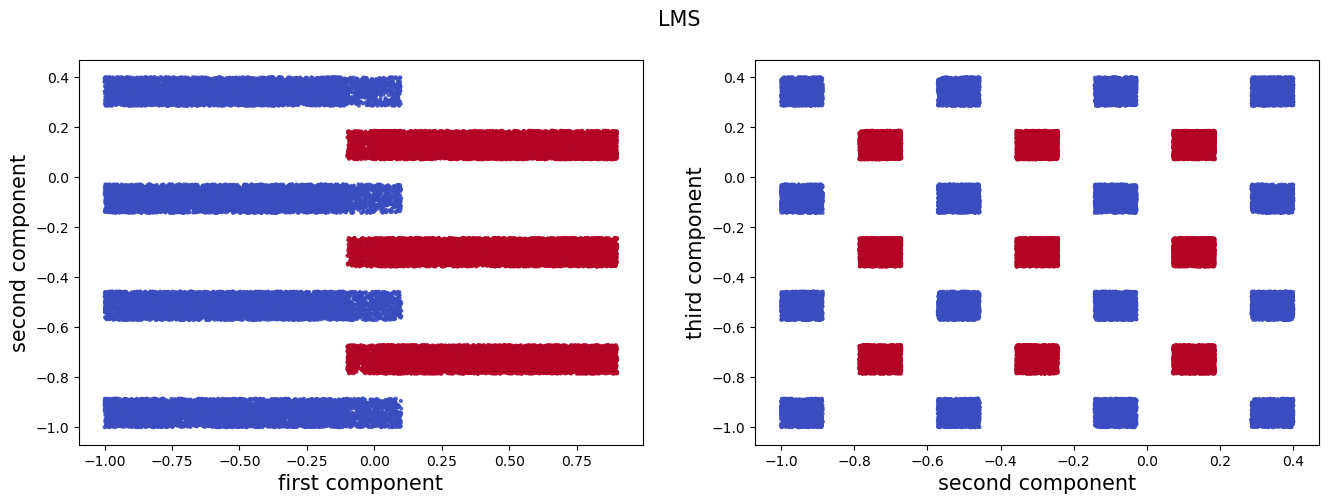

In [48]:
x, y = train_data.tensors
x = x.cpu().numpy()
y = y.cpu().numpy()
visualize_lms_array(x, y, w)

In [44]:
ref_train_data, w = load_arrays('./data/noisy_lms_ref_train.npz')
ref_val_data, _ = load_arrays('./data/noisy_lms_ref_val.npz')
ref_trainer_logger = Logger('ref_trainer')
ref_trainer_logger.setLevel('DEBUG')
ref_trainer_logger.addHandler(StreamHandler())
ref_trainer_config = dict(
    train_data=dict(
        dataset=ref_train_data,
        batch_size=256,
        shuffle=True
    ), val_data=dict(
        dataset=ref_val_data,
        batch_size=256,
        shuffle=False
    ),
    model=generate_fcn(**model_config),
    loss=torch.nn.CrossEntropyLoss(),
    device='cuda' if torch.cuda.is_available() else 'cpu',
    evaluate_interval=500,
    save_interval=0,
    work_dir='./training_logs/ref_lms7_noisy_{}/'.format(datetime.datetime.now().strftime('%m%d%H%M')),
    loss_eps=0.005,
    logger=ref_trainer_logger,
    max_steps=100000,
    optimizer=dict(
        cls='SGD',
        lr=0.1,
        weight_decay=5.0e-5
    )
)
ref_trainer = Trainer(**ref_trainer_config)

model: Sequential(
  (0): Linear(in_features=50, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)


In [45]:
ref_trainer.run()

Step 0: Loss 0.6934109330177307
Evaluating ...


Started, logging to ./training_logs/ref_lms7_noisy_09300458/...


Step: 0
Train/AverageLoss: 0.6924677877426147
Train/Accuracy: 0.509425
Val/AverageLoss: 0.6928386326789856
Val/Accuracy: 0.509
Step 500: Loss 0.10599302500486374
Evaluating ...
Step: 500
Train/AverageLoss: 0.09196858252286912
Train/Accuracy: 0.952825
Val/AverageLoss: 0.09932989836931229
Val/Accuracy: 0.9481
Step 1000: Loss 0.097358837723732
Evaluating ...
Step: 1000
Train/AverageLoss: 0.08837874215841293
Train/Accuracy: 0.95395
Val/AverageLoss: 0.09786650669574738
Val/Accuracy: 0.9481
Step 1500: Loss 0.0797085389494896
Evaluating ...
Step: 1500
Train/AverageLoss: 0.08540886853337287
Train/Accuracy: 0.9554
Val/AverageLoss: 0.09802004001140595
Val/Accuracy: 0.9476
Step 2000: Loss 0.08025125414133072
Evaluating ...
Step: 2000
Train/AverageLoss: 0.08358294162154198
Train/Accuracy: 0.956175
Val/AverageLoss: 0.09810291222333908
Val/Accuracy: 0.9475
Step 2500: Loss 0.09204369783401489
Evaluating ...
Step: 2500
Train/AverageLoss: 0.08144367113113403
Train/Accuracy: 0.95725
Val/AverageLoss: 0.0